### Practical Notebook
Here we import the required libraries and data sets for training.

In [47]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

In [8]:
# Load train data
X_amp_train = np.load("Xtrain_amp.npy")
y_amp_train = np.load("ytrain_amp.npy")

In [6]:
# Load test data
X_amp_test = np.load("Xtest_amp.npy")
y_amp_test = np.load("ytest_amp.npy")

In [26]:
# Load train data
X_mel_train = np.load("Xtrain_mel.npy")
y_mel_train = np.load("ytrain_mel.npy")

In [7]:
# Load test data
X_mel_test = np.load("Xtest_mel.npy")
y_mel_test = np.load("ytest_mel.npy")

In [6]:
# Flatten spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)

### Part A: Feature Engineering, Baseline Models

#### Raw amplitude features

Here we apply PCA to our raw amplitude features in order to extract the 500 most significant components.

In [7]:
pca = PCA(n_components=500)

# standardize data
stand_X_amp_train = (X_amp_train - np.mean(X_amp_train)) / np.std(X_amp_train)
stand_X_amp_test = (X_amp_test - np.mean(X_amp_test)) / np.std(X_amp_test)

# create our PCA object that will calculate the first 500 components.
X_amp_train_reduced = pca.fit_transform(stand_X_amp_train)
X_amp_test_reduced = pca.fit_transform(stand_X_amp_test)

# save reduced data as pickle
with open("X_amp_train_reduced.pickle", "wb") as file:
    pickle.dump(X_amp_train_reduced, file)
with open("X_amp_test_reduced.pickle", "wb") as file:
    pickle.dump(X_amp_test_reduced, file)

Once our data set is reduced in dimension, we use it to train a logistic regression classifier.

In [3]:
# load reduced data from pickle
with open('X_amp_train_reduced.pickle', "rb") as file:
    X_amp_train_reduced = pickle.load(file)
with open('X_amp_test_reduced.pickle', "rb") as file:
    X_amp_test_reduced = pickle.load(file)

In [9]:
# create logistic regression classifier
amp_lr_model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=1000)

# fit classifier
amp_lr_model.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_lr_model.pickle", "wb") as file:
    pickle.dump(amp_lr_model, file)

With our trained classifier, we make predictions and calculate the over all and per-class accuracies.

In [10]:
# load classifier from pickle
with open('amp_lr_model.pickle', "rb") as file:
    amp_lr_model = pickle.load(file)

AMP LR Model Mean Accuracy:  0.142
AMP LR Model Per-class Accuracies: [0.16  0.077 0.378 0.052 0.087 0.091 0.    0.081 0.14  0.12 ]


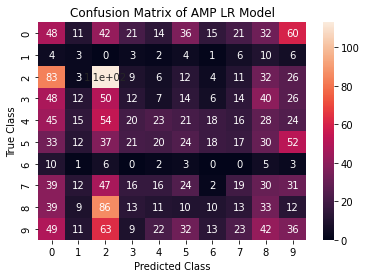

In [18]:
# make predictions
y_amp_preds = amp_lr_model.predict(X_amp_test_reduced)

# calculate accuracy and balanced accuracy
print("AMP LR Model Mean Accuracy: ", round(accuracy_score(y_amp_preds, y_amp_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_amp_test, y_amp_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("AMP LR Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of AMP LR Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#### Mel amplitude features

Here we do the same procedure for our Mel spectogram features

In [12]:
# standardize data
stand_X_mel_train_flat = (X_mel_train_flat - np.mean(X_mel_train_flat)) / np.std(X_mel_train_flat)
stand_X_mel_test_flat = (X_mel_test_flat - np.mean(X_mel_test_flat)) / np.std(X_mel_test_flat)

# create our PCA object that will calculate the first 500 components.
X_mel_train_reduced = pca.fit_transform(stand_X_mel_train_flat)
X_mel_test_reduced = pca.fit_transform(stand_X_mel_test_flat)

# save reduced data as pickle
with open("X_mel_train_reduced.pickle", "wb") as file:
    pickle.dump(X_mel_train_reduced, file)
with open("X_mel_test_reduced.pickle", "wb") as file:
    pickle.dump(X_mel_test_reduced, file)

In [4]:
# load reduced data from pickle
with open('X_mel_train_reduced.pickle', "rb") as file:
    X_mel_train_reduced = pickle.load(file)
with open('X_mel_test_reduced.pickle', "rb") as file:
    X_mel_test_reduced = pickle.load(file)

In [14]:
# create logistic regression classifier
mel_lr_model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=3000)

# fit classifier
mel_lr_model.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_lr_model.pickle", "wb") as file:
    pickle.dump(mel_lr_model, file)

In [15]:
# load classifier from pickle
with open('mel_lr_model.pickle', "rb") as file:
    mel_lr_model = pickle.load(file)

Mel LR Model Mean Accuracy:  0.169
Mel LR Model Per-class Accuracies: [0.027 0.154 0.06  0.096 0.03  0.106 0.    0.415 0.186 0.463]


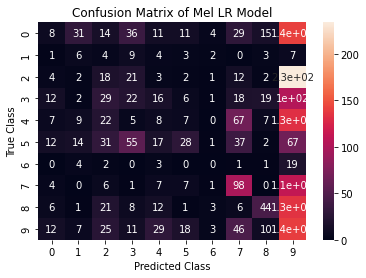

In [16]:
# make predictions
y_mel_preds = mel_lr_model.predict(X_mel_test_reduced)

# calculate accuracy and balanced accuracy
print("Mel LR Model Mean Accuracy: ", round(accuracy_score(y_mel_preds, y_mel_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_mel_test, y_mel_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("Mel LR Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of Mel LR Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Part B: More Modeling

#### B1: First Step
##### Random Forest Classifier on raw amplitude features
Here we use a Random Forest Classifier on our raw amplitude features and calculate accuracies.

In [29]:
amp_rf_model = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight="balanced")

amp_rf_model.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_rf_model.pickle", "wb") as file:
    pickle.dump(amp_rf_model, file)

AMP RF Model Mean Accuracy:  0.211
AMP RF Model Per-class Accuracies: [0.033 0.    0.776 0.009 0.159 0.28  0.    0.225 0.076 0.11 ]


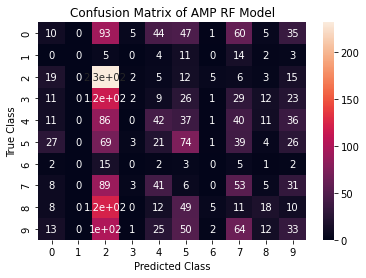

In [30]:
# load classifier from pickle
with open('amp_rf_model.pickle', "rb") as file:
    amp_rf_model = pickle.load(file)

# make predictions
y_amp_preds = amp_rf_model.predict(X_amp_test_reduced)

# calculate accuracy and balanced accuracy
print("AMP RF Model Mean Accuracy: ", round(accuracy_score(y_amp_preds, y_amp_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_amp_test, y_amp_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("AMP RF Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of AMP RF Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

##### Random Forest Classifier on raw amplitude features
Here we use a Random Forest Classifier on our Mel spectogram features and calculate accuracies.

In [31]:
mel_rf_model = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight="balanced")

mel_rf_model.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_rf_model.pickle", "wb") as file:
    pickle.dump(mel_rf_model, file)

Mel RF Model Mean Accuracy:  0.202
Mel RF Model Per-class Accuracies: [0.01  0.    0.023 0.109 0.258 0.114 0.    0.665 0.22  0.34 ]


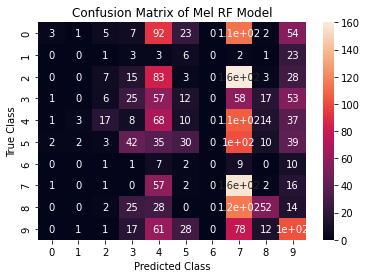

In [32]:
# load classifier from pickle
with open('mel_rf_model.pickle', "rb") as file:
    mel_rf_model = pickle.load(file)

# make predictions
y_mel_preds = mel_rf_model.predict(X_mel_test_reduced)

# calculate accuracy and balanced accuracy
print("Mel RF Model Mean Accuracy: ", round(accuracy_score(y_mel_preds, y_mel_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_mel_test, y_mel_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("Mel RF Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of Mel RF Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#### B2: More Complicated Models–Hyperparameter Tuning and Validation
##### Hyperparameter grid search on Random Forest Classifier for raw amplitude features.

In [42]:
# these are the settings that we will tune: 'C', 'kernel'
param_grid = {'n_estimators' : [320, 360, 400, 440, 480, 520], 
              'class_weight' : [None, 'balanced']}

# instantiate our template model
amp_rf = RandomForestClassifier()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
amp_rf_cv = GridSearchCV(estimator=amp_rf, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
amp_rf_cv.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_rf_cv.pickle", "wb") as file:
    pickle.dump(amp_rf_cv, file)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [52]:
# load classifier from pickle
with open('amp_rf_cv.pickle', "rb") as file:
    amp_rf_cv = pickle.load(file)

# convert our results to a pd.DataFrame
amp_rf_results = pd.DataFrame(amp_rf_cv.cv_results_).sort_values(by=['rank_test_score'])
amp_rf_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,53.081609,0.836145,0.199029,0.007614,None,480,"{'class_weight': None, 'n_estimators': 480}",0.247525,0.301530,0.239424,0.208108,0.212613,0.241840,0.033446,1
5,56.736066,1.026521,0.285556,0.043886,None,520,"{'class_weight': None, 'n_estimators': 520}",0.248425,0.300630,0.226823,0.192793,0.218919,0.237518,0.036229,2
1,40.843468,1.145556,0.159420,0.011756,None,360,"{'class_weight': None, 'n_estimators': 360}",0.243024,0.280828,0.251125,0.189189,0.218919,0.236617,0.030883,3
11,56.183748,6.556078,0.160295,0.026154,balanced,520,"{'class_weight': 'balanced', 'n_estimators': 520}",0.245725,0.288929,0.222322,0.200000,0.225225,0.236440,0.029981,4
3,49.641313,0.830187,0.197529,0.019924,None,440,"{'class_weight': None, 'n_estimators': 440}",0.239424,0.293429,0.228623,0.206306,0.209910,0.235538,0.031387,5


##### Hyperparameter grid search on Random Forest Classifier for Mel spectogram features.

In [55]:
# these are the settings that we will tune: 'C', 'kernel'
param_grid = {'n_estimators' : [320, 360, 400, 440, 480, 520], 
              'class_weight' : [None, 'balanced']}

# instantiate our template model
mel_rf = RandomForestClassifier()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
mel_rf_cv = GridSearchCV(estimator=mel_rf, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
mel_rf_cv.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_rf_cv.pickle", "wb") as file:
    pickle.dump(mel_rf_cv, file)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [56]:
# load classifier from pickle
with open('mel_rf_cv.pickle', "rb") as file:
    mel_rf_cv = pickle.load(file)

# convert our results to a pd.DataFrame
mel_rf_results = pd.DataFrame(mel_rf_cv.cv_results_).sort_values(by=['rank_test_score'])
mel_rf_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,38.430195,0.268570,0.176016,0.018249,None,440,"{'class_weight': None, 'n_estimators': 440}",0.395140,0.480648,0.425743,0.467568,0.377477,0.429315,0.039915,1
4,41.728740,0.518355,0.179705,0.021941,None,480,"{'class_weight': None, 'n_estimators': 480}",0.387939,0.480648,0.432043,0.469369,0.366667,0.427333,0.044416,2
5,44.841422,0.406633,0.187775,0.010664,None,520,"{'class_weight': None, 'n_estimators': 520}",0.395140,0.474347,0.432943,0.469369,0.359459,0.426252,0.043923,3
7,34.794827,0.361424,0.138845,0.004807,balanced,360,"{'class_weight': 'balanced', 'n_estimators': 360}",0.397840,0.477048,0.430243,0.454054,0.368468,0.425531,0.038763,4
9,42.275106,1.267242,0.171409,0.017202,balanced,440,"{'class_weight': 'balanced', 'n_estimators': 440}",0.405041,0.484248,0.423042,0.448649,0.365766,0.425349,0.039950,5


##### Hyperparameter grid search on Support Vector Machine for raw amplitude features

In [50]:
# these are the settings that we will tune: 'C', 'kernel'
param_grid = {'C' : [0.001, 0.01, 0.1, 1.0, 10.0], 
              'kernel' : ['rbf', 'sigmoid'],}

# instantiate our template model
amp_svm = SVC()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
amp_svm_cv = GridSearchCV(estimator=amp_svm, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
amp_svm_cv.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_svm_cv.pickle", "wb") as file:
    pickle.dump(amp_svm_cv, file)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [53]:
# load classifier from pickle
with open('amp_svm_cv.pickle', "rb") as file:
    amp_svm_cv = pickle.load(file)

# convert our results to a pd.DataFrame
amp_svm_cv_results = pd.DataFrame(amp_svm_cv.cv_results_).sort_values(by=['rank_test_score'])
amp_svm_cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,32.150959,0.403726,2.803883,0.638510,10.0,rbf,"{'C': 10.0, 'kernel': 'rbf'}",0.196220,0.215122,0.192619,0.145946,0.200000,0.189981,0.023313,1
6,34.789050,0.411548,3.391182,0.041025,1.0,rbf,"{'C': 1.0, 'kernel': 'rbf'}",0.180918,0.180918,0.176418,0.182883,0.161261,0.176480,0.007899,2
9,19.863294,9.833774,1.734673,0.897231,10.0,sigmoid,"{'C': 10.0, 'kernel': 'sigmoid'}",0.162916,0.175518,0.173717,0.147748,0.175676,0.167115,0.010772,3
7,33.658573,0.208510,2.706592,0.060579,1.0,sigmoid,"{'C': 1.0, 'kernel': 'sigmoid'}",0.168317,0.171917,0.141314,0.154955,0.163063,0.159913,0.010910,4
4,35.818855,0.241481,3.306815,0.093943,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.163816,0.162016,0.169217,0.161261,0.141441,0.159550,0.009472,5


##### Hyperparameter grid search on Support Vector Machine for Mel spectogram features

In [58]:
# these are the settings that we will tune: 'C', 'kernel'
param_grid = {'C' : [0.001, 0.01, 0.1, 1.0, 10.0], 
              'kernel' : ['rbf', 'sigmoid'],}

# instantiate our template model
mel_svm = SVC()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
mel_svm_cv = GridSearchCV(estimator=mel_svm, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
mel_svm_cv.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_svm_cv.pickle", "wb") as file:
    pickle.dump(mel_svm_cv, file)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [59]:
# load classifier from pickle
with open('mel_svm_cv.pickle', "rb") as file:
    mel_svm_cv_model = pickle.load(file)

# convert our results to a pd.DataFrame
mel_svm_cv_results = pd.DataFrame(mel_svm_cv.cv_results_).sort_values(by=['rank_test_score'])
mel_svm_cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,24.469780,0.180485,2.460008,0.174211,10.0,rbf,"{'C': 10.0, 'kernel': 'rbf'}",0.282628,0.335734,0.351035,0.318919,0.320721,0.321807,0.022772,1
6,29.142634,0.492753,3.300426,0.024362,1.0,rbf,"{'C': 1.0, 'kernel': 'rbf'}",0.288029,0.272727,0.248425,0.258559,0.269369,0.267422,0.013387,2
9,14.758293,6.421134,1.802704,0.933622,10.0,sigmoid,"{'C': 10.0, 'kernel': 'sigmoid'}",0.203420,0.220522,0.230423,0.216216,0.190991,0.212315,0.013743,3
7,28.028032,0.439624,2.532533,0.035360,1.0,sigmoid,"{'C': 1.0, 'kernel': 'sigmoid'}",0.225023,0.204320,0.186319,0.204505,0.218018,0.207637,0.013306,4
4,33.338296,0.179906,3.271552,0.059711,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.217822,0.171017,0.170117,0.171171,0.199099,0.185845,0.019395,5
